In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('Data/LordsMobileVN_clean.csv')

# Phân tích bài viết

In [13]:
df_post = df
df_post['reactions'] = df_post['reactions'].apply(lambda x : dict(eval(x)) )
df_post_1 = df_post['reactions'].apply(pd.Series )
# Merge cột vào dataframe
df_post_2 = pd.concat([df_post, df_post_1], axis=1).drop('reactions', axis=1)
df_post_2= df_post_2.fillna(0)
df_post_2[['post_text','like','love','haha','wow','sad','angry','care',
                                 'shares','comments','reaction_count']]


C:\Users\nhuyh\AppData\Local\Temp\ipykernel_21704\2000623767.py:3: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_post_1 = df_post['reactions'].apply(pd.Series )


,post_text,like,love,haha,wow,sad,angry,care,shares,comments,reaction_count
0,Sự hợp tác hoành tráng giữa Lords Mobile x Arm...,54.0,4.0,1.0,0.0,0.0,0.0,0.0,2,4,59
1,"🥹 Không có so sánh, không có đau thương",97.0,0.0,25.0,0.0,0.0,0.0,0.0,1,17,122
2,"Hồi xưa thấy bình thường ha, giờ thì quý lắm l...",130.0,3.0,30.0,1.0,1.0,0.0,0.0,0,22,165
3,0,91.0,2.0,6.0,0.0,0.0,0.0,0.0,0,17,99
4,🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪...,96.0,2.0,0.0,0.0,0.0,0.0,0.0,1,244,98
...,...,...,...,...,...,...,...,...,...,...,...
195,Mời các nông dân vườn khoai trả lời ạ !,183.0,2.0,44.0,2.0,2.0,1.0,0.0,0,79,234
196,"Sau bao nhiêu năm, người đàn ông tôi cần nhất ...",96.0,3.0,27.0,0.0,0.0,0.0,1.0,1,43,127
197,🧑‍⚕️ Nào mình cùng đến thăm bệnh nhân tại Thán...,176.0,3.0,164.0,2.0,3.0,0.0,2.0,1,57,350
198,Chào tháng 8 cùng nhiều sự kiện hấp dẫn diễn r...,132.0,7.0,1.0,0.0,0.0,0.0,0.0,1,27,140


In [14]:
# Tìm các bài viết chứa 1 từ khóa nào đó

a = df_post_2['post_text'].tolist()
print("có tất cả ", len(a), "bài viết")

res = []

for i in list(a):

    if "Kim Cương" in str(i):
        res.append(i)

print(len(res), "bài viết chứa từ khóa trên")

res


có tất cả  200 bài viết
20 bài viết chứa từ khóa trên


['💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\r\nTừ 10/11/2023 12:00:00 - 11/11/2023 11:59:59 (giờ Việt Nam)\r\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\r\n⚠️Lưu ý:\r\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\r\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy nhất một lần, đơn nạp tiếp theo sẽ không được khuyến mãi.\r\n- Sự kiện chỉ áp dụng cho các gói nạp có giá trị tối đa 5 triệu VND\r\n- Vui lòng nạp đúng mệnh giá. Nạp sai mệnh giá dẫn đến lỗi nạp sẽ được xử lý sau 3-5 ngày làm việc',
 '💎𝗞𝗛𝗨𝗬𝗘̂́𝗡 𝗠𝗔̃𝗜 𝟮𝟬% 𝗞𝗜𝗠 𝗖𝗨̛𝗢̛𝗡𝗚💎\r\nTừ 4/11/2023 12:00:00 - 5/11/2023 11:59:59 (giờ Việt Nam)\r\nKhuyến mãi tặng thêm 20% khi mua Kim Cương trên Webpay Gamota (https://pay.gamota.com/game/detail/lordsmobile)\r\n⚠️Lưu ý:\r\n- Chỉ áp dụng cho mệnh giá từ 20.000 đến 5 Triệu VNĐ.\r\n- Chỉ áp dụng cho đơn Nạp đầu tiên trong thời gian khuyến mãi, mỗi người chơi chỉ được khuyến mãi duy

In [15]:
# Lấy tất cả các bài viết
df_post_2['post_text']

# Tạo biến text rỗng
text = ""

# Lặp qua tất cả các bài viết
for i in df_post_2['post_text']:

    # Chuyển đổi kiểu dữ liệu của i thành str
    i_str = str(i)

    # Nối i_str vào text
    text = text + i_str + "\n"

# In kết quả
print(text)


Sự hợp tác hoành tráng giữa Lords Mobile x Armored Combat Worldwide đã kết thúc với cuộc đụng độ gay cấn giữa các Bang hội!
Chúng tôi hy vọng bạn thích chứng kiến ngọn lửa của trận chiến thời trung cổ bùng cháy trong suốt sự kiện này. ⚔️🛡️
#LordsMobile #ACW
🥹 Không có so sánh, không có đau thương
Hồi xưa thấy bình thường ha, giờ thì quý lắm luôn 😲😲😲

It was normal in the past, but now it is very precious 😲😲😲
0
🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁
▪️Bước 1: Vào game > trả lời câu hỏi trên ảnh + quýnh giá Ờ-Mây-Zing-Gút Chóp để tham gia sự kiện.
▪️Bước 2: Rung đùi và đợi ngày công bố giải thưởng thôi nè. Quá dễ luôn 😉
💁Lưu ý:
-Giải thưởng cao nhất 10k, thấp nhất 2K Ngọc liên kết.
-Thời gian diễn ra sự kiện: từ 2-4 ngày (Có thể kết thúc sớm nếu đã đủ số lượng người tham gia)
-Các Chúa Tể có thể tham gia nhiều lần để tăng cơ hội nhận giải vì giải thưởng sẽ được quay ngẫu nhiên
-Mọi quyết định cuối cùng sẽ thuộc về BTC
-Giải thưởng sẽ được gửi trực tiếp vào IGG ID của các Chúa Tể nên h

# Các mốc giờ đăng bài

In [16]:
from datetime import datetime
import datetime
df['time'] = pd.to_datetime(df['time'])
time_df = datetime.datetime.strptime(df['time'].to_string(),"%m/%d/%Y %H:%M:%S")

ValueError: time data '0     2023-11-14 16:29:00\n1     2023-11-14 08:00:00\n2     2023-11-13 16:00:00\n3     2023-11-13 10:23:14\n4     2023-11-13 10:00:03\n5     2023-11-12 19:42:38\n6     2023-11-12 08:00:01\n7     2023-11-11 12:00:03\n8     2023-11-11 08:00:00\n9     2023-11-10 20:00:04\n10    2023-11-10 12:37:04\n11    2023-11-10 10:00:00\n12    2023-11-09 18:00:04\n13    2023-11-09 16:00:03\n14    2023-11-09 08:00:05\n15    2023-11-08 18:25:48\n16    2023-11-08 16:00:00\n17    2023-11-08 10:00:00\n18    2023-11-07 16:30:00\n19    2023-11-07 08:34:25\n20    2023-11-06 10:00:01\n21    2023-11-05 08:00:00\n22    2023-11-04 11:59:09\n23    2023-11-04 09:04:42\n24    2023-11-03 18:40:08\n25    2023-11-03 10:00:00\n26    2023-11-02 09:00:10\n27    2023-11-01 08:00:00\n28    2023-10-31 16:00:05\n29    2023-10-31 09:49:50\n30    2023-10-30 16:00:00\n31    2023-10-30 12:36:26\n32    2023-10-30 08:00:00\n33    2023-10-29 09:11:01\n34    2023-10-28 08:00:00\n35    2023-10-27 19:01:41\n36    2023-10-27 11:02:38\n37    2023-10-26 16:35:02\n38    2023-10-26 14:00:51\n39    2023-10-26 11:58:04\n40    2023-10-26 10:08:40\n41    2023-10-25 08:00:00\n42    2023-10-24 16:00:02\n43    2023-10-24 08:00:03\n44    2023-10-23 13:30:00\n45    2023-10-22 11:59:01\n46    2023-10-22 08:00:01\n47    2023-10-21 08:00:01\n48    2023-10-20 15:28:15\n49    2023-10-20 14:28:40\n50    2023-10-20 08:00:03\n51    2023-10-19 22:11:00\n52    2023-10-19 14:12:11\n53    2023-10-19 13:00:01\n54    2023-10-19 08:06:00\n55    2023-10-19 02:00:23\n56    2023-10-18 21:38:13\n57    2023-10-18 19:14:00\n58    2023-10-18 10:33:56\n59    2023-10-18 08:00:00\n60    2023-10-17 08:00:01\n61    2023-10-16 13:30:00\n62    2023-10-16 08:40:09\n63    2023-10-15 08:13:01\n64    2023-10-14 09:00:00\n65    2023-10-13 08:00:00\n66    2023-10-12 08:00:00\n67    2023-10-11 13:30:00\n68    2023-10-11 08:00:01\n69    2023-10-10 09:00:00\n70    2023-10-09 14:42:55\n71    2023-10-09 09:53:07\n72    2023-10-09 09:00:00\n73    2023-10-08 08:00:01\n74    2023-10-07 09:00:00\n75    2023-10-06 08:00:00\n76    2023-10-05 10:00:00\n77    2023-10-04 09:53:53\n78    2023-10-03 19:00:00\n79    2023-10-03 13:07:17\n80    2023-10-03 08:00:00\n81    2023-10-02 16:00:01\n82    2023-10-02 10:00:01\n83    2023-10-01 08:00:00\n84    2023-09-30 08:00:01\n85    2023-09-29 19:00:01\n86    2023-09-29 16:50:30\n87    2023-09-29 11:58:36\n88    2023-09-28 10:00:00\n89    2023-09-28 07:23:01\n90    2023-09-27 22:52:29\n91    2023-09-27 12:39:05\n92    2023-09-27 08:00:01\n93    2023-09-26 16:15:38\n94    2023-09-26 08:00:01\n95    2023-09-25 14:29:27\n96    2023-09-24 20:52:04\n97    2023-09-24 12:47:57\n98    2023-09-23 11:59:00\n99    2023-09-23 09:32:49\n100   2023-09-22 16:19:45\n101   2023-09-22 08:00:01\n102   2023-09-21 19:00:01\n103   2023-09-21 16:06:05\n104   2023-09-21 09:27:50\n105   2023-09-20 15:49:58\n106   2023-09-20 08:11:01\n107   2023-09-19 10:25:56\n108   2023-09-19 08:05:00\n109   2023-09-18 15:07:59\n110   2023-09-18 10:32:42\n111   2023-09-18 08:00:02\n112   2023-09-17 21:49:45\n113   2023-09-17 08:00:03\n114   2023-09-16 16:00:55\n115   2023-09-16 08:00:02\n116   2023-09-15 16:00:00\n117   2023-09-15 08:00:05\n118   2023-09-14 15:13:04\n119   2023-09-14 08:00:00\n120   2023-09-13 16:00:01\n121   2023-09-13 08:00:00\n122   2023-09-12 19:00:01\n123   2023-09-12 16:13:02\n124   2023-09-12 10:00:00\n125   2023-09-12 08:00:01\n126   2023-09-11 15:43:04\n127   2023-09-11 12:16:30\n128   2023-09-11 08:01:04\n129   2023-09-10 20:00:00\n130   2023-09-10 08:19:09\n131   2023-09-09 15:11:35\n132   2023-09-09 08:00:00\n133   2023-09-08 16:00:04\n134   2023-09-08 10:06:28\n135   2023-09-07 16:03:56\n136   2023-09-07 14:11:34\n137   2023-09-07 08:00:00\n138   2023-09-06 08:00:03\n139   2023-09-05 17:42:12\n140   2023-09-05 10:00:03\n141   2023-09-04 16:04:26\n142   2023-09-04 10:40:57\n143   2023-09-04 10:31:12\n144   2023-09-03 08:00:01\n145   2023-09-02 08:00:01\n146   2023-09-01 17:30:00\n147   2023-09-01 08:00:01\n148   2023-08-31 13:55:55\n149   2023-08-31 10:00:11\n150   2023-08-30 14:54:20\n151   2023-08-30 13:24:30\n152   2023-08-30 08:02:01\n153   2023-08-29 14:00:03\n154   2023-08-29 10:00:04\n155   2023-08-28 08:00:00\n156   2023-08-27 08:00:04\n157   2023-08-26 08:00:01\n158   2023-08-25 12:01:04\n159   2023-08-25 08:00:04\n160   2023-08-24 15:39:10\n161   2023-08-24 08:00:04\n162   2023-08-23 10:07:00\n163   2023-08-22 09:45:01\n164   2023-08-21 16:00:01\n165   2023-08-21 11:59:01\n166   2023-08-20 08:04:02\n167   2023-08-19 08:00:01\n168   2023-08-18 15:55:14\n169   2023-08-18 10:00:03\n170   2023-08-17 08:00:00\n171   2023-08-16 12:23:00\n172   2023-08-16 10:02:00\n173   2023-08-15 12:53:00\n174   2023-08-15 09:30:00\n175   2023-08-14 15:23:00\n176   2023-08-14 14:47:00\n177   2023-08-14 08:00:00\n178   2023-08-13 08:00:00\n179   2023-08-12 08:00:00\n180   2023-08-11 15:00:01\n181   2023-08-11 12:01:06\n182   2023-08-11 10:00:00\n183   2023-08-10 12:30:00\n184   2023-08-10 10:27:12\n185   2023-08-09 13:21:03\n186   2023-08-09 08:00:02\n187   2023-08-08 08:00:02\n188   2023-08-07 17:46:52\n189   2023-08-07 13:00:04\n190   2023-08-07 08:00:42\n191   2023-08-06 22:35:25\n192   2023-08-05 08:00:03\n193   2023-08-04 16:39:04\n194   2023-08-04 14:27:42\n195   2023-08-04 11:14:35\n196   2023-08-04 08:00:01\n197   2023-08-03 16:00:02\n198   2023-08-03 08:00:01\n199   2023-08-02 08:00:02' does not match format '%m/%d/%Y %H:%M:%S'

In [ ]:
df['hour'] = df['time'].dt.hour

In [ ]:
# Tổng số bài viết theo giờ
df_posts_hour = df['hour'].value_counts()

df_posts_hour = df_posts_hour.reindex(range(24), fill_value=0)

df_posts_hour

hour
0      0
1      0
2      1
3      0
4      0
5      0
6      0
7      1
8     66
9     14
10    25
11     8
12    11
13     9
14    10
15    10
16    24
17     3
18     3
19     7
20     3
21     2
22     3
23     0
Name: count, dtype: int64

In [ ]:
# Tổng số reactions theo giờ
df_reactions_by_hour = df.groupby('hour')['reaction_count'].sum()

# Tạo 24 chỉ số, chỉ số mới có giá trị 0
df_reactions_by_hour = df_reactions_by_hour.reindex(range(24), fill_value=0)

df_reactions_by_hour

hour
0         0
1         0
2       124
3         0
4         0
5         0
6         0
7        62
8     14586
9      3593
10     4488
11      814
12     1081
13     1749
14     1372
15     1637
16     4548
17      763
18      358
19     1370
20      328
21      409
22      466
23        0
Name: reaction_count, dtype: int64

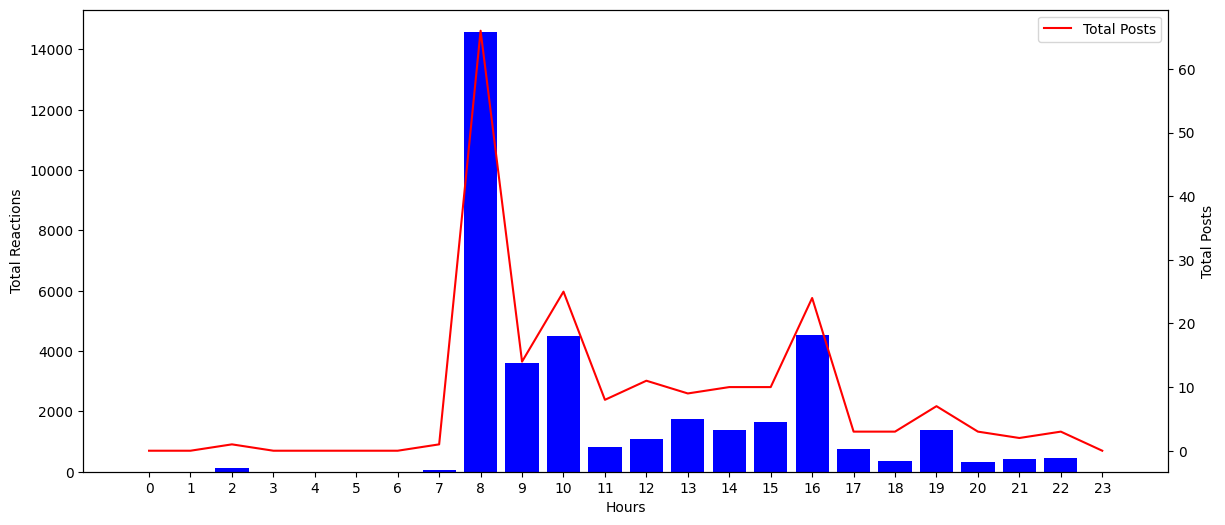

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

ax1.bar(df_reactions_by_hour.index, df_reactions_by_hour.values, color='blue', label='Total Reactions')
ax1.set_xticks(df_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

ax2.plot(df_posts_hour.index, df_posts_hour.values, color='red', label='Total Posts')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.xlabel('Hours')
plt.legend()
plt.show()

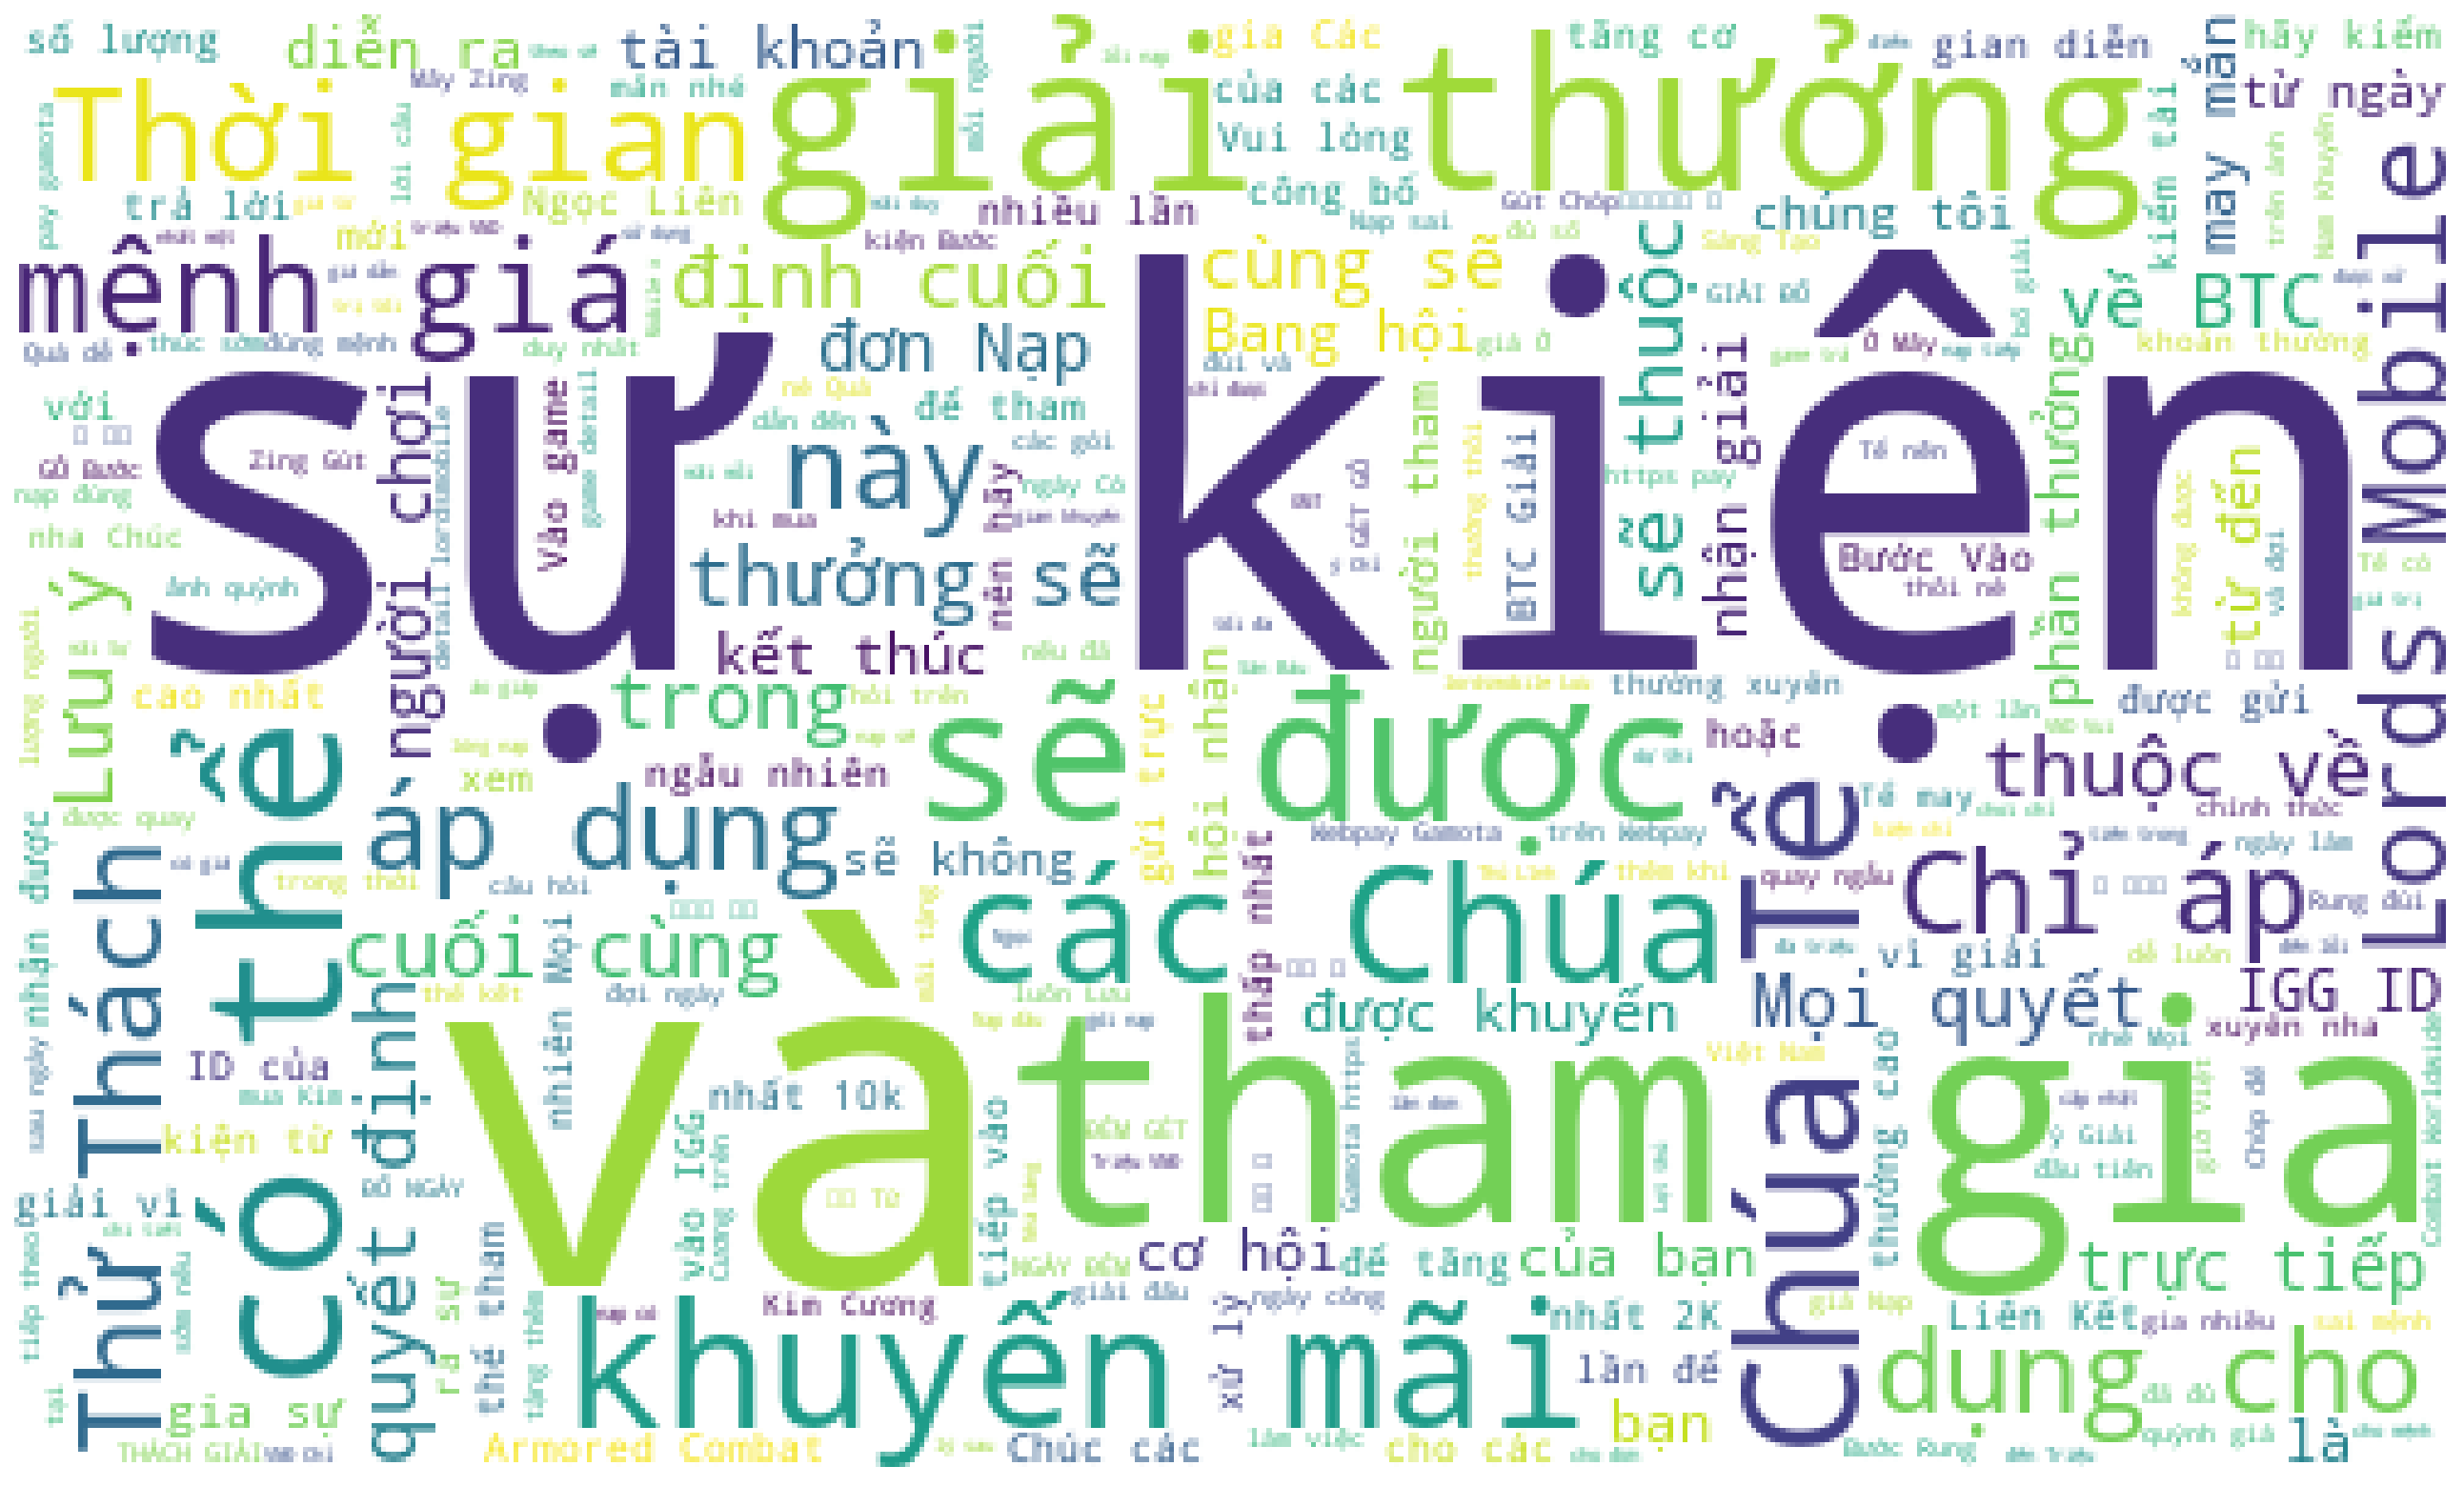

In [ ]:
# Import WordCloud library
from wordcloud import WordCloud
from pathlib import Path
import os
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
texto = text
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=500, height=300
                         ).generate(texto)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
text_fix=text 
print(len(text))
text

76517


'Sự hợp tác hoành tráng giữa Lords Mobile x Armored Combat Worldwide đã kết thúc với cuộc đụng độ gay cấn giữa các Bang hội!\r\nChúng tôi hy vọng bạn thích chứng kiến ngọn lửa của trận chiến thời trung cổ bùng cháy trong suốt sự kiện này. ⚔️🛡️\r\n#LordsMobile #ACW\n\U0001f979 Không có so sánh, không có đau thương\nHồi xưa thấy bình thường ha, giờ thì quý lắm luôn 😲😲😲\r\n\r\nIt was normal in the past, but now it is very precious 😲😲😲\n0\n🎁 THỬ THÁCH GIẢI ĐỐ 7 NGÀY 6 ĐÊM GÉT GÔ 🎁\r\n▪️Bước 1: Vào game > trả lời câu hỏi trên ảnh + quýnh giá Ờ-Mây-Zing-Gút Chóp để tham gia sự kiện.\r\n▪️Bước 2: Rung đùi và đợi ngày công bố giải thưởng thôi nè. Quá dễ luôn 😉\r\n💁Lưu ý:\r\n-Giải thưởng cao nhất 10k, thấp nhất 2K Ngọc liên kết.\r\n-Thời gian diễn ra sự kiện: từ 2-4 ngày (Có thể kết thúc sớm nếu đã đủ số lượng người tham gia)\r\n-Các Chúa Tể có thể tham gia nhiều lần để tăng cơ hội nhận giải vì giải thưởng sẽ được quay ngẫu nhiên\r\n-Mọi quyết định cuối cùng sẽ thuộc về BTC\r\n-Giải thưởng sẽ đ